In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from pandas_datareader import data as web

In [28]:
tickers = ["UVXY","^VIX","^GSPC","^TNX","SQQQ"]

In [29]:
df = pd.DataFrame()

In [30]:
for t in tickers:
    df[t] = web.DataReader(t, data_source="yahoo", start = "2010-1-1")["Adj Close"]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2364 entries, 2011-10-04 to 2021-02-25
Data columns (total 5 columns):
UVXY     2364 non-null float64
^VIX     2364 non-null float64
^GSPC    2364 non-null float64
^TNX     2342 non-null float64
SQQQ     2364 non-null float64
dtypes: float64(5)
memory usage: 110.8 KB


In [32]:
df.corr()

,UVXY,^VIX,^GSPC,^TNX,SQQQ
UVXY,1.000000,0.301078,-0.372167,-0.034448,0.742593
^VIX,0.301078,1.000000,0.126879,-0.525185,0.128140
^GSPC,-0.372167,0.126879,1.000000,-0.244267,-0.755181
^TNX,-0.034448,-0.525185,-0.244267,1.000000,-0.040497
SQQQ,0.742593,0.128140,-0.755181,-0.040497,1.000000


### Getting Returns

In [33]:
returns = df.pct_change()

In [35]:
returns.columns = ["UVXY returns", "^VIX returns", "^GSPC returns","^TNX returns","SQQ Returns"]

In [36]:
df = pd.concat([df,returns], axis=1)

In [37]:
df

,UVXY,^VIX,^GSPC,^TNX,SQQQ,UVXY returns,^VIX returns,^GSPC returns,^TNX returns,SQQ Returns
Date,,,,,,,,,,
2011-10-04,2.058000e+08,40.820000,1123.949951,1.781,33129.957031,NaN,NaN,NaN,NaN,NaN
2011-10-05,1.813800e+08,37.810001,1144.030029,1.905,30634.449219,-0.118659,-0.073738,0.017866,0.069624,-0.075325
2011-10-06,1.740000e+08,36.270000,1164.969971,1.986,29085.517578,-0.040688,-0.040730,0.018304,0.042520,-0.050562
2011-10-07,1.765200e+08,36.200001,1155.459961,2.068,29650.998047,0.014483,-0.001930,-0.008163,0.041289,0.019442
2011-10-10,1.559400e+08,33.020000,1194.890015,2.076,26626.894531,-0.116587,-0.087845,0.034125,0.003868,-0.101990
...,...,...,...,...,...,...,...,...,...,...
2021-02-19,8.810000e+00,22.049999,3906.709961,1.345,12.540000,-0.057754,-0.019564,-0.001855,0.045066,0.012924
2021-02-22,9.360000e+00,23.450001,3876.500000,1.370,13.520000,0.062429,0.063492,-0.007733,0.018587,0.078150
2021-02-23,8.790000e+00,23.110001,3881.370117,1.362,13.630000,-0.060897,-0.014499,0.001256,-0.005839,0.008136


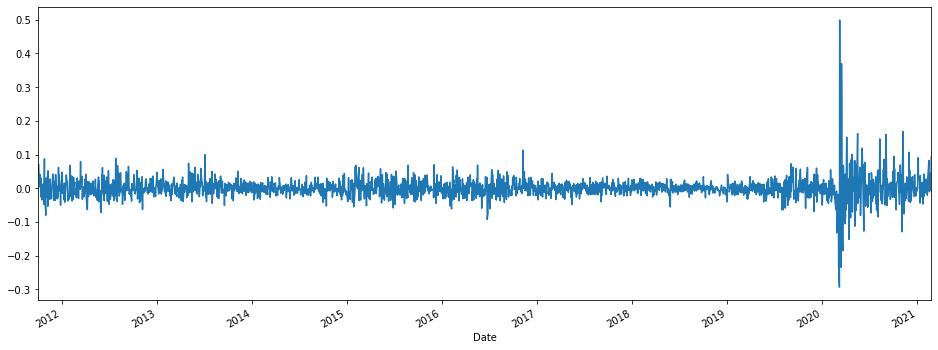

In [38]:
df["^TNX returns"].plot(figsize = (16,6))

In [39]:
df[df["^TNX returns"] * 100 > 45]

,UVXY,^VIX,^GSPC,^TNX,SQQQ,UVXY returns,^VIX returns,^GSPC returns,^TNX returns,SQQ Returns
Date,,,,,,,,,,
2020-03-10,40.450001,47.299999,2882.22998,0.748,112.17984,-0.116233,-0.131473,0.049396,0.498998,-0.156039


In [40]:
df[df["^TNX returns"] * 100 < -28]

,UVXY,^VIX,^GSPC,^TNX,SQQQ,UVXY returns,^VIX returns,^GSPC returns,^TNX returns,SQQ Returns
Date,,,,,,,,,,
2020-03-09,45.77,54.459999,2746.560059,0.499,132.920654,0.368311,0.298522,-0.07597,-0.293201,0.206881


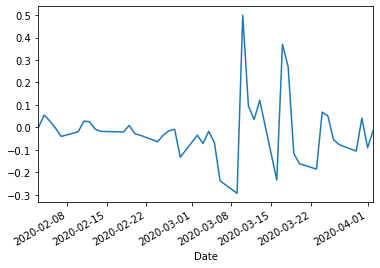

In [41]:
df.loc["2020-02-02":"2020-04-02"]["^TNX returns"].plot(kind = "line")

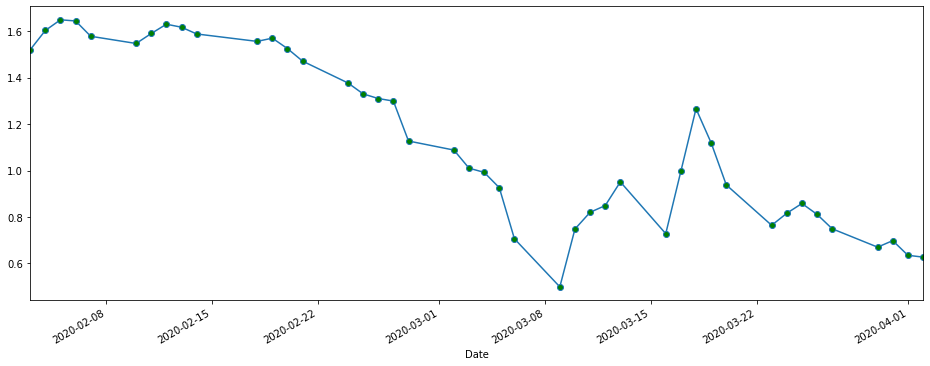

In [42]:
df.loc["2020-02-02":"2020-04-02"]["^TNX"].plot(kind = "line", figsize = (16,6), marker ="o", mfc = "g")

In [43]:
df.loc["2020-02-02":"2020-04-02"]["^TNX"].mean()

1.134790699149287

In [44]:
df.loc["2020-02-02":"2020-04-02"]["^GSPC returns"]

Date
2020-02-03    0.007255
2020-02-04    0.014980
2020-02-05    0.011251
2020-02-06    0.003326
2020-02-07   -0.005401
2020-02-10    0.007326
2020-02-11    0.001688
2020-02-12    0.006463
2020-02-13   -0.001630
2020-02-14    0.001844
2020-02-18   -0.002920
2020-02-19    0.004706
2020-02-20   -0.003816
2020-02-21   -0.010518
2020-02-24   -0.033514
2020-02-25   -0.030280
2020-02-26   -0.003779
2020-02-27   -0.044163
2020-02-28   -0.008238
2020-03-02    0.046039
2020-03-03   -0.028108
2020-03-04    0.042203
2020-03-05   -0.033922
2020-03-06   -0.017054
2020-03-09   -0.075970
2020-03-10    0.049396
2020-03-11   -0.048868
2020-03-12   -0.095113
2020-03-13    0.092871
2020-03-16   -0.119841
2020-03-17    0.059955
2020-03-18   -0.051831
2020-03-19    0.004708
2020-03-20   -0.043360
2020-03-23   -0.029294
2020-03-24    0.093828
2020-03-25    0.011535
2020-03-26    0.062414
2020-03-27   -0.033687
2020-03-30    0.033516
2020-03-31   -0.016013
2020-04-01   -0.044142
2020-04-02    0.022829
Name: 

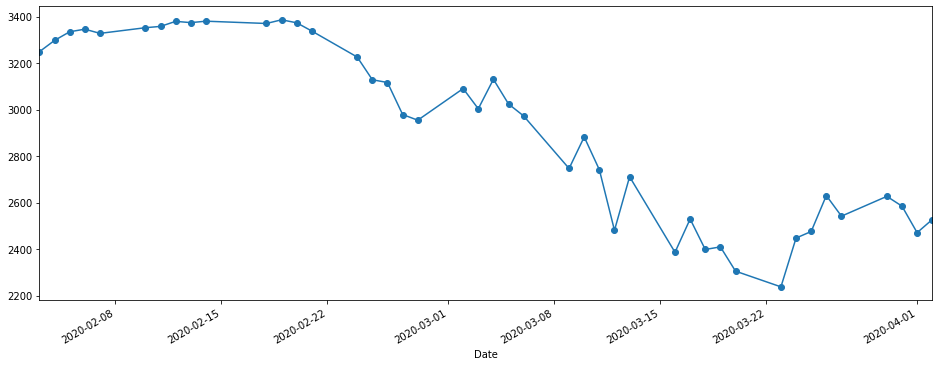

In [19]:
df.loc["2020-02-02":"2020-04-02"]["^GSPC"].plot(figsize = (16,6), marker = "o")

## S&P 

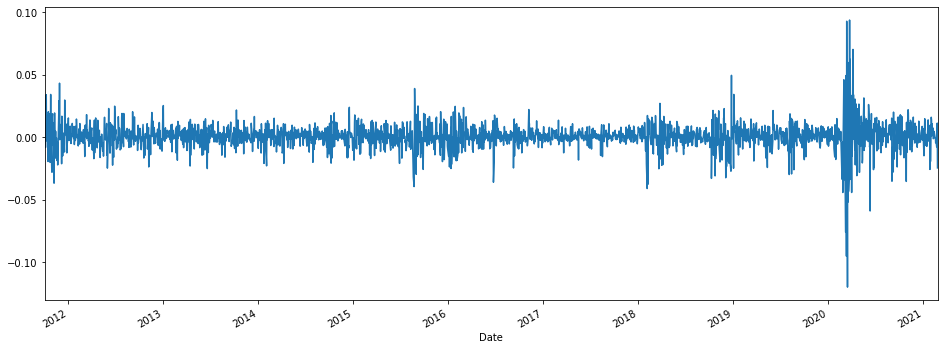

In [20]:
df['^GSPC returns'].plot(figsize = (16,6))

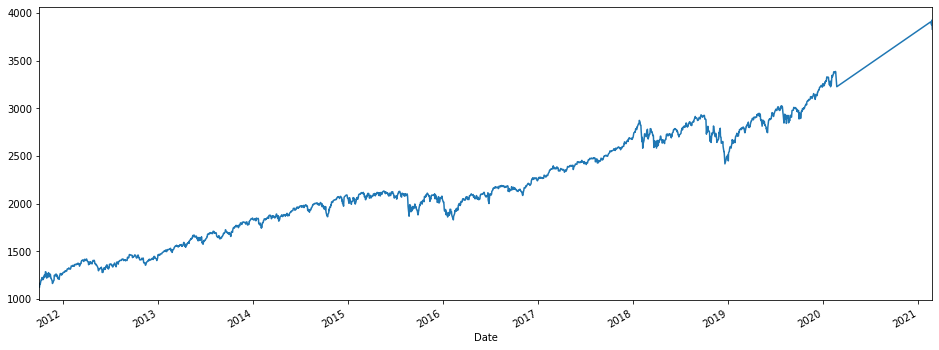

In [21]:
df[df["^TNX"] > 1.345]["^GSPC"].plot(figsize = (16,6))

In [22]:
df[df["^TNX"] > 2.545]["^GSPC returns"]

Date
2013-06-24   -0.012145
2013-06-25    0.009497
2013-07-05    0.010202
2013-07-08    0.005252
2013-07-09    0.007230
                ...   
2019-04-17   -0.002274
2019-04-18    0.001579
2019-04-22    0.001012
2019-04-23    0.008841
2019-05-02   -0.002124
Name: ^GSPC returns, Length: 550, dtype: float64

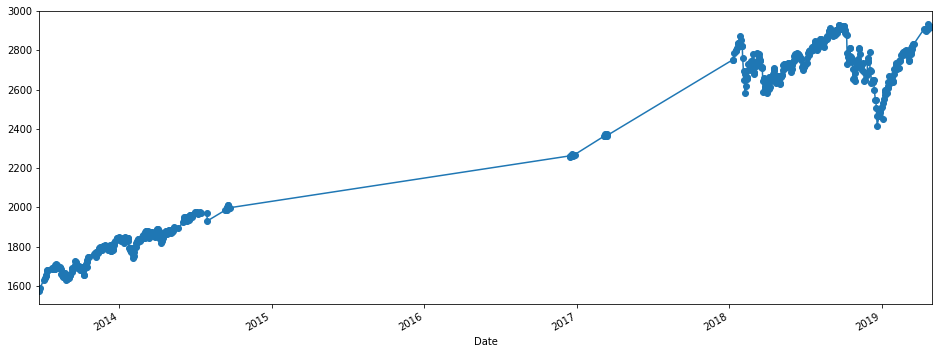

In [23]:
df[df["^TNX"] > 2.545]["^GSPC"].plot(figsize = (16,6), marker = "o")

In [24]:
df[df["^TNX"] > 3.045]["^TNX"].sort_values(ascending = False).head()

Date
2018-11-08    3.234
2018-10-08    3.233
2018-10-05    3.225
2018-10-10    3.225
2018-11-02    3.214
Name: ^TNX, dtype: float64

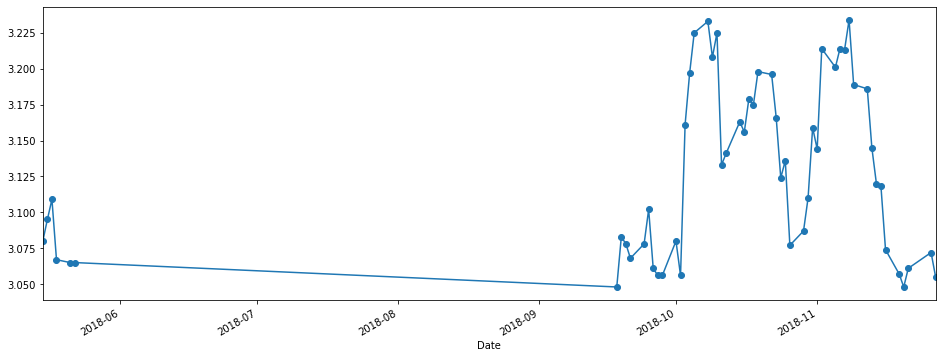

In [25]:
df[df["^TNX"] > 3.045]["^TNX"].plot(figsize = (16,6), marker = "o")

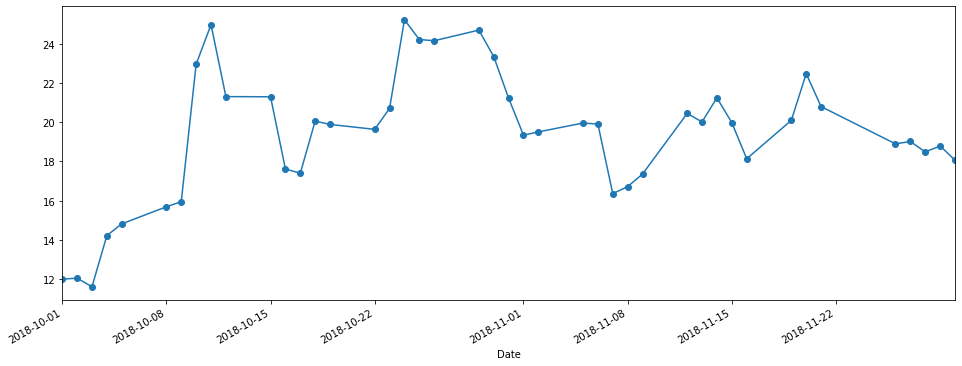

In [26]:
df[df["^TNX"] > 3]["^VIX"].loc["2018-10-1":].plot(figsize = (16,6), marker ="o")

In [27]:
(df[df["^TNX"] > 3]["^VIX returns"].loc["2018-10-1":].std()) * 252

28.24886326681117